In [26]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from hockey_rink import NHLRink, RinkImage
# https://github.com/the-bucketless/hockey_rink
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt

## https://thecommutesports.com/2022/08/06/creating-nhl-shot-maps-with-python/
## https://github.com/gredelsheimer/RandomCode/blob/main/create_rink.py

def create_rink(
    ax, 
    plot_half = False, 
    board_radius = 28,
    alpha = 1,
):
    #Cornor Boards
    ax.add_artist(mpl.patches.Arc((100-board_radius , (85/2)-board_radius), board_radius * 2, board_radius * 2 , theta1=0, theta2=89, edgecolor='Black', lw=4.5,zorder=0, alpha = alpha)) #Top Right
    ax.add_artist(mpl.patches.Arc((-100+board_radius+.1 , (85/2)-board_radius), board_radius * 2, board_radius * 2 ,theta1=90, theta2=180, edgecolor='Black', lw=4.5,zorder=0, alpha = alpha)) #Top Left
    ax.add_artist(mpl.patches.Arc((-100+board_radius+.1 , -(85/2)+board_radius-.1), board_radius * 2, board_radius * 2 ,theta1=180, theta2=270, edgecolor='Black', lw=4.5,zorder=0, alpha = alpha)) #Bottom Left
    ax.add_artist(mpl.patches.Arc((100-board_radius , -(85/2)+board_radius-.1), board_radius * 2, board_radius * 2 ,theta1=270, theta2=360, edgecolor='Black', lw=4.5,zorder=0, alpha = alpha)) #Bottom Right

    #[x1,x2],[y1,y2]
    #Plot Boards 
    ax.plot([-100+board_radius,100-board_radius], [-42.5, -42.5], linewidth=4.5, color="Black",zorder=0, alpha = alpha) #Bottom
    ax.plot([-100+board_radius-1,100-board_radius+1], [42.5, 42.5], linewidth=4.5, color="Black",zorder=0, alpha = alpha) #Top
    ax.plot([-100,-100], [-42.5+board_radius, 42.5-board_radius], linewidth=4.5, color="Black",zorder=0, alpha = alpha) #Left
    ax.plot([100,100], [-42.5+board_radius, 42.5-board_radius], linewidth=4.5, color="Black",zorder=0, alpha = alpha) #Right

    #Goal Lines 
    adj_top = 4.6
    adj_bottom = 4.5
    ax.plot([89,89], [-42.5+adj_bottom, 42.5 - adj_top], linewidth=3, color="Red",zorder=0, alpha = alpha)
    ax.plot([-89,-89], [-42.5+adj_bottom, 42.5 - adj_top], linewidth=3, color="Red",zorder=0, alpha = alpha)

    #Plot Center Line
    ax.plot([0,0], [-42.5, 42.5], linewidth=3, color="Red",zorder=0, alpha = alpha)
    ax.plot(0,0, markersize = 6, color="Blue", marker = "o",zorder=0, alpha = alpha) #Center FaceOff Dots
    ax.add_artist(mpl.patches.Circle((0, 0), radius = 33/2, facecolor='none', edgecolor="Blue", linewidth=3,zorder=0, alpha = alpha)) #Center Circle

    #Zone Faceoff Dots
    ax.plot(69,22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)
    ax.plot(69,-22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)
    ax.plot(-69,22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)
    ax.plot(-69,-22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)

    #Zone Faceoff Circles
    ax.add_artist(mpl.patches.Circle((69, 22), radius = 15, facecolor='none', edgecolor="Red", linewidth=3,zorder=0, alpha = alpha)) 
    ax.add_artist(mpl.patches.Circle((69,-22), radius = 15, facecolor='none', edgecolor="Red", linewidth=3,zorder=0, alpha = alpha)) 
    ax.add_artist(mpl.patches.Circle((-69,22), radius = 15, facecolor='none', edgecolor="Red", linewidth=3,zorder=0, alpha = alpha)) 
    ax.add_artist(mpl.patches.Circle((-69,-22), radius = 15, facecolor='none', edgecolor="Red", linewidth=3,zorder=0, alpha = alpha)) 

    #Neutral Zone Faceoff Dots
    ax.plot(22,22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)
    ax.plot(22,-22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)
    ax.plot(-22,22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)
    ax.plot(-22,-22, markersize = 6, color="Red", marker = "o",zorder=0, alpha = alpha)

    #Plot Blue Lines
    ax.plot([25,25], [-42.5, 42.5], linewidth=2, color="Blue",zorder=0, alpha = alpha)
    ax.plot([-25,-25], [-42.5, 42.5], linewidth=2, color="Blue",zorder=0, alpha = alpha)

    #Goalie Crease
    ax.add_artist(mpl.patches.Arc((89, 0), 6,6,theta1=90, theta2=270,  facecolor="Blue", edgecolor='Red', lw=2,zorder=0, alpha = alpha))
    ax.add_artist(mpl.patches.Arc((-89, 0), 6,6, theta1=270, theta2=90, facecolor="Blue", edgecolor='Red', lw=2,zorder=0, alpha = alpha))

    #Goal
    ax.add_artist(mpl.patches.Rectangle((89, 0 - (4/2)), 2, 4, lw=2, color='Red',fill=False,zorder=0, alpha = alpha))
    ax.add_artist(mpl.patches.Rectangle((-89 - 2, 0 - (4/2)), 2, 4, lw=2, color='Red',fill=False,zorder=0, alpha = alpha))

    if plot_half == False:
        # Set axis limits
        ax.set_xlim(-101, 101)
        ax.set_ylim(-43, 43)  

    elif plot_half == True:
        # Set axis limits
        ax.set_xlim(-0.5, 100.5)
        ax.set_ylim(-43, 43) 


    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)

# fig, ax = plt.subplots(1,1, figsize=(10,12), facecolor='w', edgecolor='k')
# create_rink(ax, plot_half=True)
# plt.show()

In [5]:

# Finding moneypucks shot data from 2013-2021
url = "https://peter-tanner.com/moneypuck/downloads/shots_2013-2021.zip" 
storage_options = {'User-Agent': 'Mozilla/5.0'} 
df = pd.read_csv(url, storage_options=storage_options) 


,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,0,TBL,PIT,2021,0,20001,0,10,63,0.0,...,0.202514,0.028594,0.445979,0.289830,0.023891,0.718082,1.0,1.0,TBL,61.0
1,1,TBL,PIT,2021,0,20001,0,15,104,13.0,...,0.285948,0.027629,0.303080,0.325607,0.026384,0.793188,0.0,1.0,PIT,65.0
2,2,TBL,PIT,2021,0,20001,0,17,121,31.0,...,0.161225,0.012846,0.307661,0.486296,0.019218,0.840122,1.0,1.0,TBL,8.0
3,3,TBL,PIT,2021,0,20001,0,21,167,1.0,...,0.161623,0.053163,0.374061,0.264891,0.024508,0.729294,0.0,1.0,PIT,60.0
4,4,TBL,PIT,2021,0,20001,0,24,187,4.0,...,0.116379,0.059078,0.432747,0.284554,0.018850,0.695010,1.0,1.0,TBL,63.0


In [7]:
print(df.shape) 
display(df.head())

(982314, 124)


,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,0,TBL,PIT,2021,0,20001,0,10,63,0.0,...,0.202514,0.028594,0.445979,0.289830,0.023891,0.718082,1.0,1.0,TBL,61.0
1,1,TBL,PIT,2021,0,20001,0,15,104,13.0,...,0.285948,0.027629,0.303080,0.325607,0.026384,0.793188,0.0,1.0,PIT,65.0
2,2,TBL,PIT,2021,0,20001,0,17,121,31.0,...,0.161225,0.012846,0.307661,0.486296,0.019218,0.840122,1.0,1.0,TBL,8.0
3,3,TBL,PIT,2021,0,20001,0,21,167,1.0,...,0.161623,0.053163,0.374061,0.264891,0.024508,0.729294,0.0,1.0,PIT,60.0
4,4,TBL,PIT,2021,0,20001,0,24,187,4.0,...,0.116379,0.059078,0.432747,0.284554,0.018850,0.695010,1.0,1.0,TBL,63.0


In [46]:
data_2021 = df[(df['season'] == 2021) & (df['shotOnEmptyNet'] == 0) & 
               (df['homeSkatersOnIce'] == 5) & (df['awaySkatersOnIce'] == 5)]
print(data_2021.shape)
display(df.head())

(95440, 124)


,shotID,homeTeamCode,awayTeamCode,season,isPlayoffGame,game_id,homeTeamWon,id,time,timeUntilNextEvent,...,xFroze,xRebound,xPlayContinuedInZone,xPlayContinuedOutsideZone,xPlayStopped,xShotWasOnGoal,isHomeTeam,shotWasOnGoal,teamCode,arenaAdjustedXCordABS
0,0,TBL,PIT,2021,0,20001,0,10,63,0.0,...,0.202514,0.028594,0.445979,0.289830,0.023891,0.718082,1.0,1.0,TBL,61.0
1,1,TBL,PIT,2021,0,20001,0,15,104,13.0,...,0.285948,0.027629,0.303080,0.325607,0.026384,0.793188,0.0,1.0,PIT,65.0
2,2,TBL,PIT,2021,0,20001,0,17,121,31.0,...,0.161225,0.012846,0.307661,0.486296,0.019218,0.840122,1.0,1.0,TBL,8.0
3,3,TBL,PIT,2021,0,20001,0,21,167,1.0,...,0.161623,0.053163,0.374061,0.264891,0.024508,0.729294,0.0,1.0,PIT,60.0
4,4,TBL,PIT,2021,0,20001,0,24,187,4.0,...,0.116379,0.059078,0.432747,0.284554,0.018850,0.695010,1.0,1.0,TBL,63.0


In [47]:
data_2021.columns

Index(['shotID', 'homeTeamCode', 'awayTeamCode', 'season', 'isPlayoffGame',
       'game_id', 'homeTeamWon', 'id', 'time', 'timeUntilNextEvent',
       ...
       'xFroze', 'xRebound', 'xPlayContinuedInZone',
       'xPlayContinuedOutsideZone', 'xPlayStopped', 'xShotWasOnGoal',
       'isHomeTeam', 'shotWasOnGoal', 'teamCode', 'arenaAdjustedXCordABS'],
      dtype='object', length=124)

In [48]:
print([item for item in data_2021.columns])

['shotID', 'homeTeamCode', 'awayTeamCode', 'season', 'isPlayoffGame', 'game_id', 'homeTeamWon', 'id', 'time', 'timeUntilNextEvent', 'timeSinceLastEvent', 'period', 'team', 'location', 'event', 'goal', 'shotPlayContinuedOutsideZone', 'shotPlayContinuedInZone', 'shotGoalieFroze', 'shotPlayStopped', 'shotGeneratedRebound', 'homeTeamGoals', 'awayTeamGoals', 'xCord', 'yCord', 'xCordAdjusted', 'yCordAdjusted', 'shotAngle', 'shotAngleAdjusted', 'shotAnglePlusRebound', 'shotAngleReboundRoyalRoad', 'shotDistance', 'shotType', 'shotOnEmptyNet', 'shotRebound', 'shotAnglePlusReboundSpeed', 'shotRush', 'speedFromLastEvent', 'lastEventxCord', 'lastEventyCord', 'distanceFromLastEvent', 'lastEventShotAngle', 'lastEventShotDistance', 'lastEventCategory', 'lastEventTeam', 'homeEmptyNet', 'awayEmptyNet', 'homeSkatersOnIce', 'awaySkatersOnIce', 'awayPenalty1TimeLeft', 'awayPenalty1Length', 'homePenalty1TimeLeft', 'homePenalty1Length', 'playerPositionThatDidEvent', 'playerNumThatDidEvent', 'playerNumThatDi

In [143]:
X = data_2021[['isPlayoffGame', 'timeSinceLastEvent', 'period', 
      'arenaAdjustedShotDistance', 'arenaAdjustedXCord', 'arenaAdjustedYCord',
               'shooterLeftRight', 'shooterTimeOnIce', 'shotAngleAdjusted', 'offWing',"shotType"]]
#               ,'shooterName'
Y = data_2021['goal']
x_goals = data_2021['xGoal']

In [150]:
# X_dummies = pd.concat([X,pd.get_dummies(X['shooterName'])], axis=1)
X_dummies = pd.concat([X,pd.get_dummies(X['shotType'])], axis=1)
X_dummies = pd.concat([X_dummies,pd.get_dummies(X['shooterLeftRight'])], axis=1)
X_dummies.drop(['shotType','shooterLeftRight'], inplace=True, axis = 1)
# X_dummies.drop(['shooterName','shooterLeftRight'], inplace=True, axis = 1)

In [151]:
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=100).fit(X_dummies, Y)


C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [152]:
clf.score(X_dummies, Y)

0.9387782900251467

In [153]:
preds = clf.predict_proba(X_dummies)

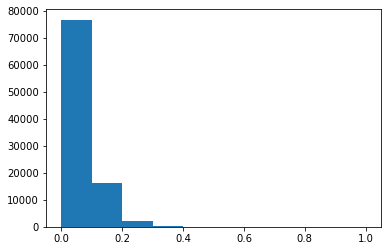

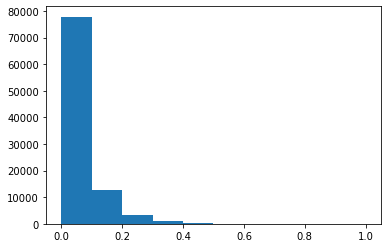

In [154]:
goal_probs = preds[:,1]

plt.hist(goal_probs, range = [0,1])
plt.show()

plt.hist(x_goals, range = [0,1])
plt.show()

In [155]:
pd.DataFrame(columns = X_dummies.columns, data = clf.coef_)

,isPlayoffGame,timeSinceLastEvent,period,arenaAdjustedShotDistance,arenaAdjustedXCord,arenaAdjustedYCord,shooterTimeOnIce,shotAngleAdjusted,offWing,BACK,DEFL,SLAP,SNAP,TIP,WRAP,WRIST,L,R
0,-0.073,-0.009897,0.037425,-0.057652,-0.000269,0.000377,-0.001846,-0.015627,0.11793,-0.354295,-0.432217,0.568863,0.511138,-0.48934,-0.323235,0.077012,-0.229374,-0.201935


In [107]:
data_2020 = df[(df['season'] == 2020) & (df['shotOnEmptyNet'] == 0) & 
               (df['homeSkatersOnIce'] == 5) & (df['awaySkatersOnIce'] == 5)]

In [109]:
X_2020 = data_2020[['isPlayoffGame', 'timeSinceLastEvent', 'period', 
      'arenaAdjustedShotDistance', 'arenaAdjustedXCord', 'arenaAdjustedYCord',
               'shooterLeftRight', 'shooterTimeOnIce', 'shotAngleAdjusted', 'offWing']]
#               ,'shooterName'
Y_2020 = data_2020['goal']
x_goals_2020 = data_2020['xGoal']
X_dummies_2020 = pd.concat([X_2020,pd.get_dummies(X_2020['shooterLeftRight'])], axis=1)
X_dummies_2020.drop(['shooterLeftRight'], inplace=True, axis = 1)

In [111]:
pred_2020 = clf.predict_proba(X_dummies_2020)[:,1]

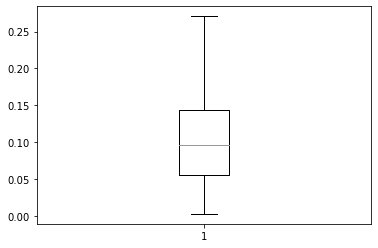

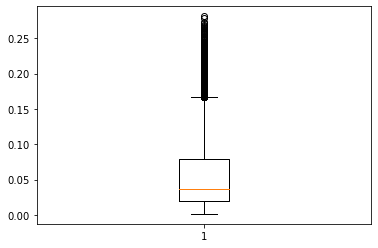

In [141]:

# plt.scatter(pred_2020, x_goals_2020)
# plt.show()
plt.boxplot(pred_2020[Y_2020 == 1])
plt.show()
plt.boxplot(pred_2020[(1-Y_2020) == 1])
plt.show()